### 用python实现核PCA

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from scipy.spatial.distance import pdist, squareform

In [2]:
from scipy import exp

In [3]:
from scipy.linalg import eigh

In [4]:
import numpy as np

In [26]:
def ref_kernel_pca(x, gamma, n_components):
    # 计算平方欧式距离
    sq_dists = pdist(x, 'sqeuclidean')
    # 将距离转化成正方形矩阵
    mat_sq_dists = squareform(sq_dists)
    # 计算核(相似)矩阵K
    K = exp(-gamma * mat_sq_dists)
    # 对核矩阵进行中心化处理
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    # 计算特征值,特征向量
    eigvals, eigvecs = eigh(K)
    x_pc = np.column_stack((eigvecs[:, -i] for i in range(1, n_components + 1)))
    
    return x_pc

* 半月形数据分割

In [27]:
from sklearn.datasets import make_moons

In [28]:
x, y = make_moons(n_samples=100, random_state=123)

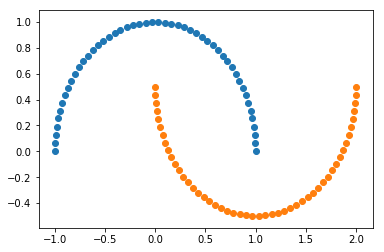

In [29]:
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

In [30]:
# 用标准pca处理
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components = 2)
x_spca = scikit_pca.fit_transform(x)

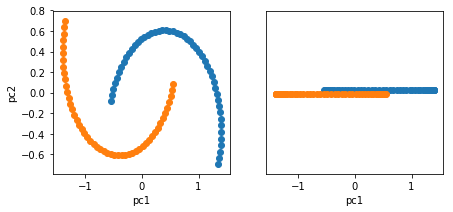

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(x_spca[y==0, 0], x_spca[y==0, 1])
ax[0].scatter(x_spca[y==1, 0], x_spca[y==1, 1])
ax[1].scatter(x_spca[y==0, 0], np.zeros((50, 1))+0.02)
ax[1].scatter(x_spca[y==1, 0], np.zeros((50, 1))-0.02)
ax[0].set_xlabel('pc1')
ax[0].set_ylabel('pc2')
ax[1].set_xlabel('pc1')
ax[1].set_ylim([-0.8, 0.8])
ax[1].set_yticks([])
plt.show()

In [32]:
# 使用rbf_kernel_pca解决非线性问题
from matplotlib.ticker import FormatStrFormatter

In [34]:
x_kpca = ref_kernel_pca(x, gamma=15, n_components=2)

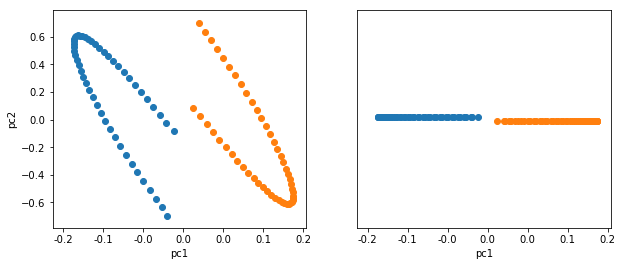

In [42]:
flg, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].scatter(x_kpca[y==0, 0], x_spca[y==0, 1])
ax[0].scatter(x_kpca[y==1, 0], x_spca[y==1, 1])
ax[1].scatter(x_kpca[y==0, 0], np.zeros((50, 1))+0.02)
ax[1].scatter(x_kpca[y==1, 0], np.zeros((50, 1))-0.02)
ax[0].set_xlabel('pc1')
ax[0].set_ylabel('pc2')
ax[1].set_xlabel('pc1')
ax[1].set_ylim([-1, 1])
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].set_yticks([])
plt.show()